# 无监督学习
## 聚类
    将数据集划分到几个子集
    基本目标-分组，层级聚类，并能识别噪声，分组依赖距离
    距离衡量：闵氏距离、马氏距离、余弦相似度、
#### 闵氏距离Minkowski
    设有两个向量<x1,x2...>,<y1,y2,...>，d = (Σ|xi-yi|^p)^(1/p)
##### 欧几里得距离Euclidean
    p=2时，最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中，为点 x = (x1,...,xn) 和 y = (y1,...,yn) 之间的距离。欧氏距离虽然很有用，但也有明显的缺点。它将样品的不同属性（即各指标或各变量量纲）之间的差别等同看待，这一点有时不能满足实际要求。例如，在教育研究中，经常遇到对人的分析和判别，个体的不同属性对于区分个体有着不同的重要性。因此，欧氏距离适用于向量各分量的度量标准统一的情况。
##### 曼哈顿距离Manhattan
    p=1时，定义曼哈顿距离的正式意义为L1-距离或城市区块距离，也就是在欧几里得空间的固定直角坐标系上两点所形成的线段对轴产生的投影的距离总和。例如在平面上，坐标（x1, y1）的点P1与坐标（x2, y2）的点P2的曼哈顿距离为：|x1-x2|+|y1-y2|，要注意的是，曼哈顿距离依赖座标系统的转度，而非系统在座标轴上的平移或映射。当坐标轴变动时，点间的距离就会不同。
    通俗来讲，想象你在曼哈顿要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。而实际驾驶距离就是这个“曼哈顿距离”，这也是曼哈顿距离名称的来源， 同时，曼哈顿距离也称为城市街区距离(City Block distance)。
#### 马氏距离Mahalanobis
    闵氏距离缺陷：将每个维度看成时等权的，没有考虑特征之间的相关性。马氏距离为解决这两个问题，设有特征向量x，y，d = ((x-y)'s^-1(x-y))^1/2,其中s为协方差矩阵，对角线上的元素用于表示每个维度的权重，其它为两两特征维度之间的相关性，‘表示转置，-1表示求逆矩阵

### K-means算法
     假定聚类的每个分组中有一个中心点，算法的目的就是找到这些中心的合适坐标，使得所有样本向量到其对应的分组中心距离最小。算法结果在一定程度上依赖于开始的随机中心点
#### 初始时，随机选择K个分组中心，为每个中心找到各自的样本数据，具体做法为一个样本数据与哪个中心点距离小则划分到哪个中心点；
#### 然后在每个组内用该中心点重新计算出更合适的中心点，计算时遵循距离最小
#### 重复迭代至收敛，收敛条件为距离低于某个要求或者新中心点不在变化
#### 算法本身不保证全局最优解，故在进行多轮从初始化到迭代收敛的完整过程，最后选取其中距离最小的一轮作为最后结果
#### 如何选取K即分组个数，在没有固定标准时，一般K值越大距离越小，但当K增大到和样本值相等时，虽然距离为0，但聚类也就失去了意义，故因应该选择对距离减小效果已经不显著时的K值，即找到距离关于K值曲线的拐点

In [13]:
## scikit-learn聚类实现

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

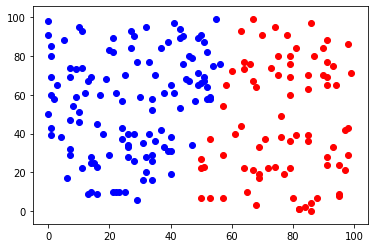

In [77]:
from sklearn.cluster import KMeans

X = np.random.randint(100, size=(200, 2))

# 初始化        分组个数K     
kmeans = KMeans(n_clusters=2).fit(X)

x0 = np.argwhere(kmeans.labels_== 0).reshape(-1, )
x1 = np.argwhere(kmeans.labels_ == 1).reshape(-1, )


plt.scatter(X[x0, 0], X[x0, 1], c='b')
plt.scatter(X[x1, 0], X[x1, 1], c='r')

### 近邻算法AP
    无需指定K值，通过迭代找到质心，质心需为样本数据中的某个点。迭代更新责任度矩阵r和可用度矩阵a，更新规则为：r(i,k)的新值等于原始相似度s（i，k）减去上一轮迭代i节点收到的最大“相似度+可用度”组合，可以理解为如果有其它成员更想做质心，则节点i给k的责任度减小；a（i，k）的新值等于其自责任a(k,k)加上其它成员发给k的所有正向责任度的和，可以理解为有越多的成员想让k成为质心，则k越自告奋勇当质心。对i来说，r（i，k）+a（i，k）取得最大值时k即为i所在组的质心，迭代收敛条件为若干次迭代结果没有发生变化或达到最大迭代次数
#### 质心exemplar
    聚类中每一组的核心成员
#### 参考度preference
    数据集中每一个数据想成为质心的初始参考值
#### 相似度similarity
    记为s（i，k）一般为两个特征向量之间的距离
#### 责任度responsibility
    为矩阵r(i, k)，i成员想让k成为质心并加入的值大小
#### 可用度availability
    矩阵a(i,k)， k成员对i表现出来的想成为质心的值大小

In [79]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-200, ).fit(X)
max(af.labels_)

37